In [1]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [2]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

In [4]:
categories_path = '../data/categories.npy'
data_path = '../data/training_data.npy'
valid_path = '../data/valid_periods.npy'
categories = np.load(categories_path, allow_pickle=True)
data = np.load(data_path, allow_pickle=True)
valid = np.load(valid_path, allow_pickle=True)
print('Data loaded')

Data loaded


---

### create dataframe

In [5]:


cols = []
for i in range(len(categories)):
    cols.append("timeseries" + str(i))
df1 = pd.DataFrame(np.transpose(data), columns=cols)
df1 

,timeseries0,timeseries1,timeseries2,timeseries3,timeseries4,timeseries5,timeseries6,timeseries7,timeseries8,timeseries9,...,timeseries47990,timeseries47991,timeseries47992,timeseries47993,timeseries47994,timeseries47995,timeseries47996,timeseries47997,timeseries47998,timeseries47999
0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,0.640741,0.640,0.932531,0.486370,0.704545,0.673469,0.841492,0.82875,0.119403,0.107014,...,0.082809,0.749190,0.732024,0.653406,0.733459,0.319784,0.494914,0.588816,0.523316,0.576220
2772,0.516667,0.536,0.955206,0.450502,0.863636,0.653061,0.878788,0.86250,0.130258,0.098921,...,0.072276,0.824082,0.701938,0.589687,0.807554,0.447455,0.504665,0.625000,0.445596,0.588415
2773,0.602778,0.600,0.960481,0.470588,0.727273,0.653061,0.841492,0.86250,0.124830,0.098022,...,0.071384,0.898371,0.783550,0.602126,0.882692,0.454175,0.504545,0.526316,0.445596,0.542683
2774,0.367593,0.460,0.946506,0.569584,0.818182,0.632653,0.841492,0.87625,0.132972,0.091727,...,0.071545,0.048314,0.808614,0.611088,0.051239,0.623485,0.521760,0.582237,0.585492,0.609756


(2726, 48000) (50, 48000)


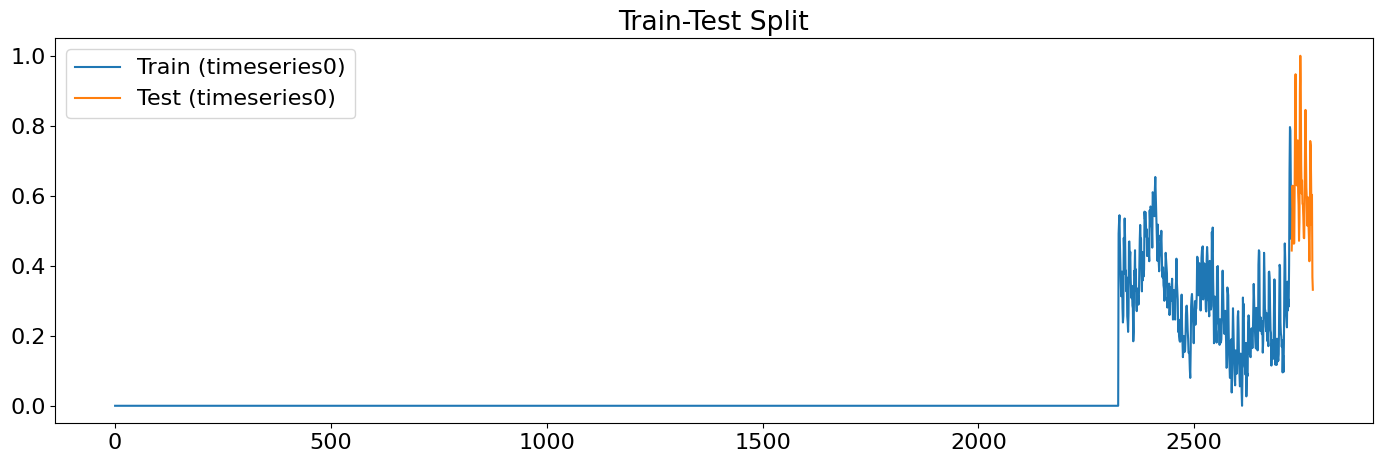

In [6]:
test_size = 50
X_train_raw_beibe = df1.iloc[:-test_size]
X_test_raw_beibe = df1.iloc[-test_size:]
print(X_train_raw_beibe.shape, X_test_raw_beibe.shape)

X_min = X_train_raw_beibe.min()
X_max = X_train_raw_beibe.max()

plt.figure(figsize=(17,5))
plt.plot(X_train_raw_beibe.timeseries0, label='Train (timeseries0)')
plt.plot(X_test_raw_beibe.timeseries0, label='Test (timeseries0)')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [7]:
window = 10
stride = 5
future1 = df1[-window:]
future1 = np.expand_dims(future1, axis=0)
future1.shape

(1, 10, 48000)

In [8]:
def build_sequences1(df, target_labels=['timeseries0'], window=10, stride=5, telescope=10):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    temp_df = df.copy().values
    temp_label = df[target_labels].copy().values
    padding_check = len(df)%window

    if(padding_check != 0):
        # Compute padding length
        padding_len = window - len(df)%window
        padding = np.zeros((padding_len,temp_df.shape[1]), dtype='float32')
        temp_df = np.concatenate((padding,df))
        padding = np.zeros((padding_len,temp_label.shape[1]), dtype='float32')
        temp_label = np.concatenate((padding,temp_label))
        assert len(temp_df) % window == 0

    for idx in np.arange(0,len(temp_df)-window-telescope,stride):
        dataset.append(temp_df[idx:idx+window])
        labels.append(temp_label[idx+window:idx+window+telescope])

    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [9]:
target_labels1 = df1.columns
telescope = 10
direct_telescope = telescope

In [10]:
X_train1, y_train1 = build_sequences1(X_train_raw_beibe, target_labels1, window, stride, direct_telescope)
X_test1, y_test1 = build_sequences1(X_test_raw_beibe, target_labels1, window, stride, direct_telescope)
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

: 

In [ ]:
X_train1